In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn/Telco_customer_churn.xlsx - Telco_Churn.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
filepath='/kaggle/input/customer-churn/Telco_customer_churn.xlsx - Telco_Churn.csv'
churn=pd.read_csv(filepath)

In [4]:
remove=['Count','Lat Long','Country','State','Churn Reason','Latitude', 'Longitude']   
churn.drop(columns=remove,inplace=True)

In [5]:
churn_test=churn.copy(deep=True)

In [6]:
churn.head().T

,0,1,2,3,4
CustomerID,3668-QPYBK,9237-HQITU,9305-CDSKC,7892-POOKP,0280-XJGEX
City,Los Angeles,Los Angeles,Los Angeles,Los Angeles,Los Angeles
Zip Code,90003,90005,90006,90010,90015
Gender,Male,Female,Female,Female,Male
Senior Citizen,No,No,No,No,No
Partner,No,No,No,Yes,No
Dependents,No,Yes,Yes,Yes,Yes
Tenure Months,2,2,8,28,49
Phone Service,Yes,Yes,Yes,Yes,Yes
Multiple Lines,No,No,Yes,Yes,Yes


In [7]:
col_obj=['Gender', 'Senior Citizen','Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
        'Churn Label', 'Churn Value','Zip Code','City']

for col in col_obj:
    churn[col] = churn[col].astype('category')

In [8]:
churn['Total Charges']=pd.to_numeric(churn['Total Charges'], downcast="float",errors='coerce')

# Q1: Please read the file and explain data types statistically as well as how python is reading it. Please let us know if any data type is read wrong.

# Q2: Please apply appropriate statistical measures using python based on data types.

In [9]:
churn.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Score,CLTV
count,7043.000000,7043.000000,7032.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.299561,58.699418,4400.295755
std,24.559481,30.090047,2266.770264,21.525131,1183.057152
min,0.000000,18.250000,18.799999,5.000000,2003.000000
25%,9.000000,35.500000,401.450012,40.000000,3469.000000
50%,29.000000,70.350000,1397.475098,61.000000,4527.000000
75%,55.000000,89.850000,3794.737549,75.000000,5380.500000
max,72.000000,118.750000,8684.799805,100.000000,6500.000000


In [10]:
churn.describe(include='category')

,City,Zip Code,Gender,Senior Citizen,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Value
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,1129,1652,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2,2
top,Los Angeles,90001,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,0
freq,305,5,3555,5901,3641,5416,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174,5174


# Q3: What is the percentage of females and senior citizens in this data set? Please create appropriate plots and explain the plots.

In [11]:
female_senior=churn.groupby('Gender')['Senior Citizen'].value_counts().unstack()
cell_hover = {  # for row hover use <tr> instead of <td>
    'selector': 'td:hover',
    'props': [('background-color', '#ffffb3')]
}
index_names = {
    'selector': '.index_name',
    'props': 'font-style: italic; color: darkgrey; font-weight:normal;'
}
headers = {
    'selector': 'th:not(.index_name)',
    'props': 'background-color: #000066; color: white;'
}
female_senior.style.set_table_styles([cell_hover, index_names, headers])

,No,Yes
Gender,,
Female,2920,568
Male,2981,574


In [12]:
churn.Gender.value_counts()
g_i=churn.Gender.value_counts().index
g_v=churn.Gender.value_counts().values
churn['Senior Citizen'].value_counts()
s_i=churn['Senior Citizen'].value_counts().index
s_v=churn['Senior Citizen'].value_counts().values
churn[churn['Gender']=='Female']['Senior Citizen'].value_counts()
f_s_i=churn[churn['Gender']=='Female']['Senior Citizen'].value_counts().index
f_s_v=churn[churn['Gender']=='Female']['Senior Citizen'].value_counts().values

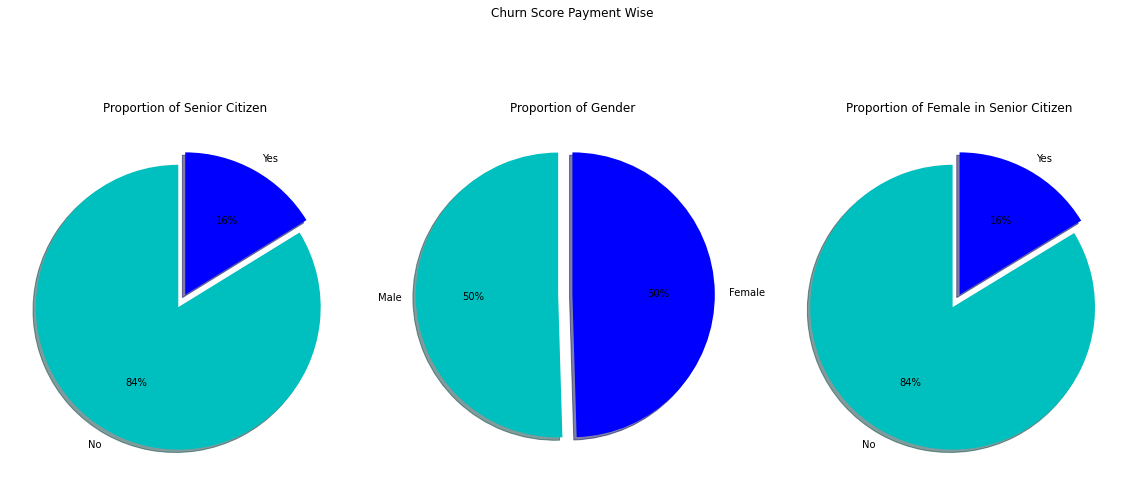

In [13]:
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
axs[0].pie(s_v, labels=s_i, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0.1, 0))
axs[1].pie(g_v, labels=g_i, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0.1, 0))
axs[2].pie(f_s_v, labels=f_s_i, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0.1, 0))
fig.suptitle('Churn Score Payment Wise')
axs[0].title.set_text('Proportion of Senior Citizen')
axs[1].title.set_text('Proportion of Gender')
axs[2].title.set_text('Proportion of Female in Senior Citizen')
plt.tight_layout()
plt.show()

# Q4:  Please create an appropriate plot to examine the distribution of the tenure month column and explain the distribution. Based on distribution, perform appropriate statistical measures. Please also explain if the variable is symmetric or skewed. Please calculate it. Explain everything as asked.

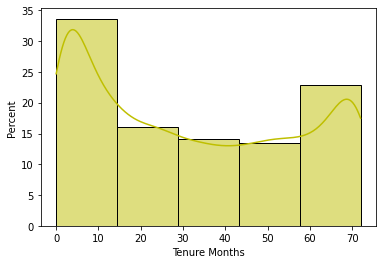

In [14]:
ax = sns.histplot(churn['Tenure Months'],kde=True,color="y",stat='percent',bins=5)

['count', 'frequency', 'density', 'probability', 'proportion', 'percent']

# Q5: Please convert all binary columns into 0 and 1 using appropriate programming constructs, not one by one.

#  Q6: Please examine the distribution of monthly charges between males and females using box plots. Please explain the results also.

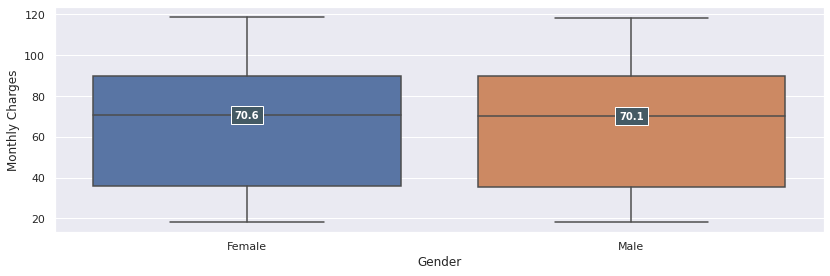

In [15]:
sns.set(rc={'figure.figsize':(11.7,4)})
box_plot = sns.boxplot(x="Gender", y='Monthly Charges', data=churn)
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(cat, y, f'{y}', 
        ha='center', va='center', fontweight='bold', size=10, color='white',bbox=dict(facecolor='#445A64'))
box_plot.figure.tight_layout()

Source=(http://stackoverflow.com/a/56879116)

#  Q7: Please find what is the minimum total charges for Los Angeles city. Please find which zip code has the maximum total charges.

In [16]:
Los_ang=churn[churn["City"]=='Los Angeles']

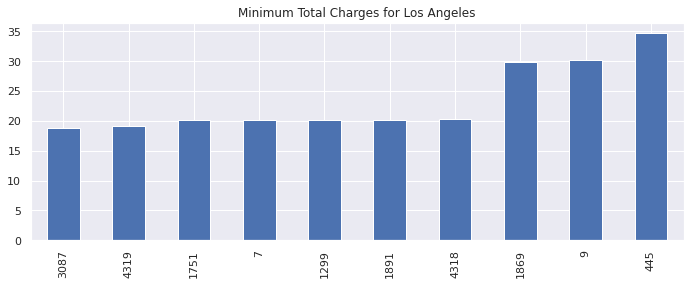

In [17]:
Los_ang['Total Charges'].nsmallest(10).plot(kind='bar',title='Minimum Total Charges for Los Angeles');

In [18]:
churn.groupby('Zip Code').agg({'Total Charges':np.median})[:20]['Total Charges'].nlargest(10)

Zip Code
90014    3656.250000
90011    3487.949951
90008    2104.550049
90018    1873.699951
90021    1862.900024
90004    1840.750000
90010    1834.949951
90007    1301.099976
90019    1261.000000
90002    1185.949951
Name: Total Charges, dtype: float32

In [19]:
churn.groupby('Zip Code')['Total Charges'].max().nlargest(10)

Zip Code
95519    8684.799805
95461    8672.450195
90822    8670.099609
92230    8594.400391
92614    8564.750000
95237    8547.150391
92870    8543.250000
93428    8529.500000
94515    8496.700195
92124    8477.700195
Name: Total Charges, dtype: float32

In [20]:
churn['Zip Code'].value_counts()

90001    5
91803    5
91917    5
91916    5
91915    5
        ..
93705    4
93704    4
93703    4
93702    4
96161    4
Name: Zip Code, Length: 1652, dtype: int64

In [21]:
churn.columns

Index(['CustomerID', 'City', 'Zip Code', 'Gender', 'Senior Citizen', 'Partner',
       'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Label', 'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

# Q8: Please find which payment method has the highest churn score and which has the lowest churn score.

In [22]:
churn_sc_pm=churn.groupby('Payment Method').agg({'Churn Score':np.median})['Churn Score'].nlargest(4)
churn_sc_pm

Payment Method
Electronic check             69.0
Mailed check                 57.0
Bank transfer (automatic)    56.0
Credit card (automatic)      56.0
Name: Churn Score, dtype: float64

In [23]:
label1=churn_sc_pm.index
values=churn_sc_pm.values.flatten()
label =['Electronic check', 'Mailed check',
                  'Bank transfer (automatic)', 'Credit card (automatic)']

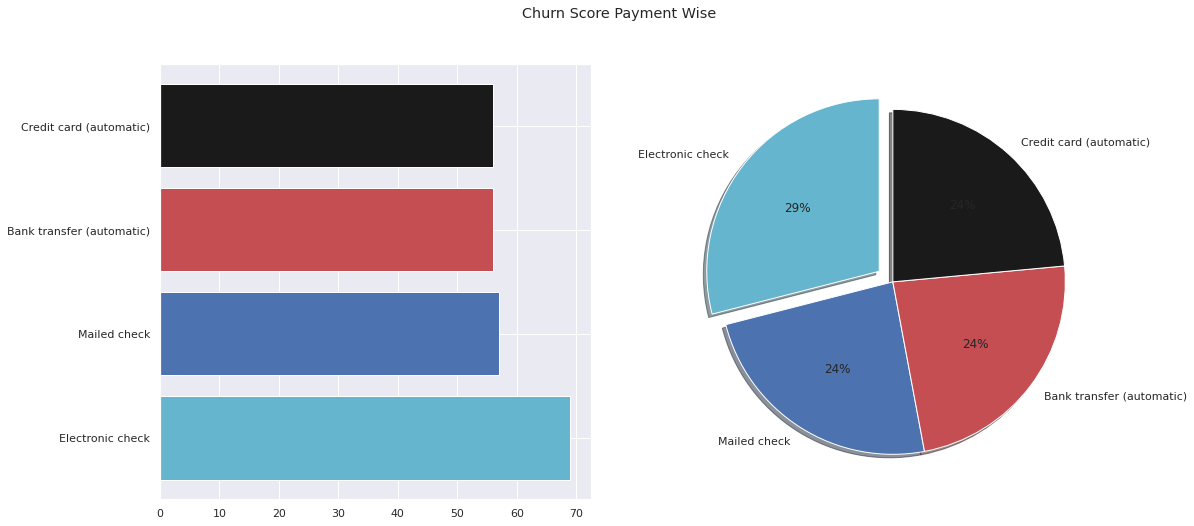

In [24]:
cols = ['c', 'b', 'r', 'k']
fig, axs = plt.subplots(1, 2, figsize=(17, 8))
axs[0].barh(label, values,color = cols)
axs[1].pie(values, labels=label, colors = cols, startangle = 90, shadow = True, autopct='%1.0f%%', explode = (0.1, 0, 0, 0))
fig.suptitle('Churn Score Payment Wise')
plt.show()

# Q9: Please create an appropriate plot to check the count of payment methods and explain it.

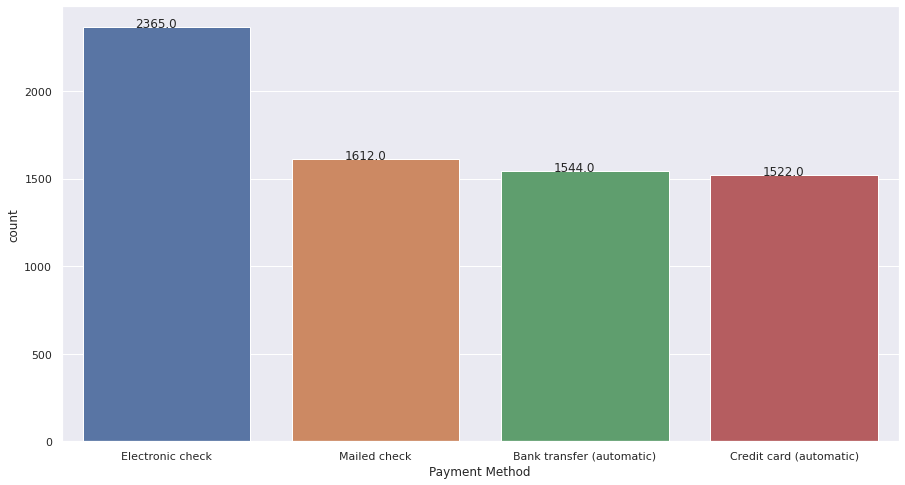

In [25]:
plt.figure(figsize=(15,8))
ax=sns.countplot(x='Payment Method',data=churn,order=['Electronic check', 'Mailed check',
                  'Bank transfer (automatic)', 'Credit card (automatic)'])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Q10: Please create an appropriate plot to see the relationship between monthly charges and total charges.

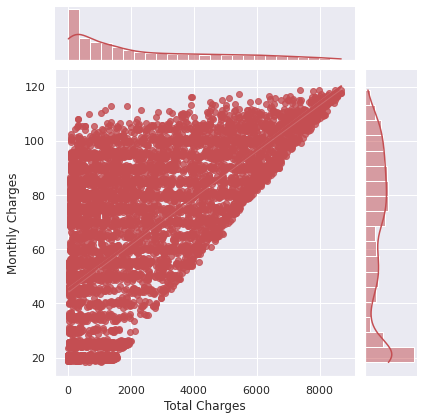

In [26]:
sns.set_theme(style="darkgrid")
sns.jointplot(data=churn, y="Monthly Charges", x="Total Charges",
                  kind="reg",palette="Set2",color='r')